## SESSION 2: Measuring code performance

<br> \textbf{OBJECTIVE: Submit a performance analysis of a self-implemented physics textbook function or constant using Julia benchmarking tools.}
<br> •  KR1: Implemented (customized) at least one math/physics textbook function, or constant (prefer those that involve a sum or a loop) in Julia. Discuss its importance in Physics. See Resources in the webpage.
<br> •  KR2: Compare the performance (accuracy) of the implemented function in comparison with the existing special functions within Julia (or a reliable module)
<br> •  KR3: Successful loading of the `BenchmarkTools` module. May need to add it first via the `Pkg` or REPL package mode.
<br> •  KR4: Itemized differences between `@time`, `@btime`, `@benchmark` and other `@time`-like macros. Nice if the situations when they are best applied are mentioned.
<br> •  KR5: Identified demonstrated useful features within the `Profiler` module of Julia. Features must be explained why useful for your case.
<br> •  KR6: A discussion of the performance of the implemented function above.

In [128]:
N = 500


500

In [135]:
function dft(y)
    N = length(y)
    c = zeros(ComplexF64, N÷2 + 1)
    c_list = zeros(ComplexF64, 0)
    for k in range(1, stop=N÷2)
        for n in range(1,stop=N)
            c[k] += y[n]*exp(-2im*pi*k*n/N)
            append!(c_list, (c[k]))
        end
    return c_list
    end
end

dft (generic function with 1 method)

In [136]:
c = zeros(ComplexF64, N÷2 + 1)
length(c)

251

In [137]:
#GENERATE A SQUARE WAVE
y1 = -ones(N)
y1[1:N÷2] .= 1;

In [138]:
dft(y1)

500-element Vector{ComplexF64}:
    0.9999210442038161 - 0.012566039883352607im
    1.9996052334871162 - 0.03769613532669008im
    2.9988947061277056 - 0.07538631799662462im
     3.997631662733723 - 0.1256306361763942im
     4.995658391161995 - 0.18842115570570755im
     5.992817291422609 - 0.2637479612336403im
     6.988950900565782 - 0.35159915778438344im
     7.983901917547082 - 0.45196087263559837im
      8.97751322806709 - 0.5648172575090801im
     9.969627929381568 - 0.6901504910733843im
     10.96008935507822 - 0.8279407817580224im
    11.948741099816134 - 0.9781663708787796im
    12.935427044024003 - 1.1408035360736632im
                       ⋮
     8.969627929381623 - 317.61554689148784im
     7.977513228067146 - 317.7408801250521im
     6.983901917547137 - 317.85373650992557im
     5.988950900565837 - 317.95409822477677im
     4.992817291422664 - 318.0419494213275im
    3.9956583911620505 - 318.11727622685544im
     2.997631662733779 - 318.18006674638474im
    1.998894706127

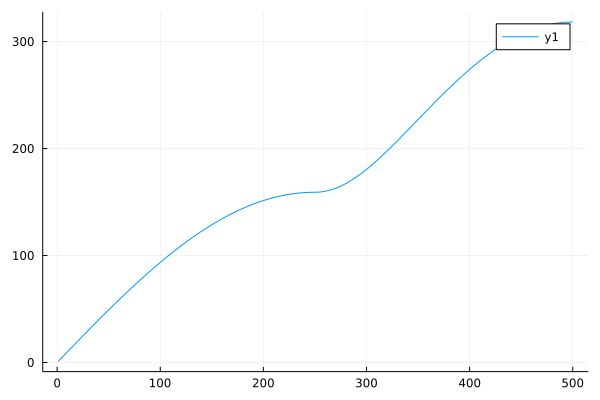

In [139]:
using Plots

plot(abs.(dft(y1)))

In [140]:
?abs

search: abs abs2 abspath abstract AbstractSet AbstractRGB abstract type



```
abs(x)
```

The absolute value of `x`.

When `abs` is applied to signed integers, overflow may occur, resulting in the return of a negative value. This overflow occurs only when `abs` is applied to the minimum representable value of a signed integer. That is, when `x == typemin(typeof(x))`, `abs(x) == x < 0`, not `-x` as might be expected.

# Examples

```jldoctest
julia> abs(-3)
3

julia> abs(1 + im)
1.4142135623730951

julia> abs(typemin(Int64))
-9223372036854775808
```


In [119]:
y = [1,2,3,4]
N = length(y)
c = zeros(N÷2 + 1)
# for k in range(1, stop=N÷2)
#     println(k)
#     for n in range(1,stop=N)
#         println(n)
#     end
# end

3-element Vector{Float64}:
 0.0
 0.0
 0.0

In [120]:
?zeros

search: zeros count_zeros set_zero_subnormals get_zero_subnormals leading_zeros



```
zeros([T=Float64,] dims::Tuple)
zeros([T=Float64,] dims...)
```

Create an `Array`, with element type `T`, of all zeros with size specified by `dims`. See also [`fill`](@ref), [`ones`](@ref).

# Examples

```jldoctest
julia> zeros(1)
1-element Vector{Float64}:
 0.0

julia> zeros(Int8, 2, 3)
2×3 Matrix{Int8}:
 0  0  0
 0  0  0
```


In [27]:
XX = range(1, stop=N÷2)
for i in XX
    println(i)
end

1
2


In [37]:
for n in range(1,stN)
    println(n)
end

LoadError: ArgumentError: At least one of `length` or `step` must be specified

In [42]:
n = 2
k = 1
y[n]*exp(-2im*pi*k*n/N)

-2.0 - 2.4492935982947064e-16im